# **Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Normalization

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/final.csv')
print(df.shape)
df.head()

(10449, 20)


,id,artist,name,popularity,preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,label
0,2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,99,NaN,0.764,0.320,11.0,-7.209,1.0,0.0546,0.8370,0.00000,0.0822,0.575,91.019,audio_features,189486.0,4.0,toplists
1,6WrI0LAC5M1Rw2MnX2ZvEg,Dua Lipa,Don't Start Now,95,https://p.scdn.co/mp3-preview/ed151225213380a4...,0.794,0.793,11.0,-4.521,0.0,0.0842,0.0125,0.00000,0.0952,0.677,123.941,audio_features,183290.0,4.0,toplists
2,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,94,NaN,0.704,0.225,6.0,-14.454,0.0,0.0994,0.9020,0.65700,0.1060,0.243,120.006,audio_features,245426.0,4.0,toplists
3,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,88,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,0.621,0.601,6.0,-5.616,0.0,0.1480,0.0522,0.00000,0.4600,0.457,116.735,audio_features,163636.0,5.0,toplists
4,4VginDwYTP2eaHJzO0QMjG,Post Malone,Circles,68,NaN,0.704,0.758,0.0,-3.537,1.0,0.0402,0.2330,0.00144,0.0924,0.534,120.003,audio_features,214907.0,4.0,toplists


In [ ]:
cols = ['artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','label']
non_categorical = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
categorical = ['artist','key','mode','time_signature','label']

# %ms = MinMaxScaler()
df[non_categorical] = df[non_categorical].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# df[non_categorical] = mms.fit_transform(df[non_categorical])
df.head()

,id,artist,name,popularity,preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,label
0,2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,99,NaN,0.782787,0.320,11.0,0.867161,1.0,0.060331,0.840361,0.00000,0.082863,0.585540,0.377600,audio_features,0.133347,4.0,toplists
1,6WrI0LAC5M1Rw2MnX2ZvEg,Dua Lipa,Don't Start Now,95,https://p.scdn.co/mp3-preview/ed151225213380a4...,0.813525,0.793,11.0,0.911314,0.0,0.093039,0.012550,0.00000,0.095968,0.689409,0.514180,audio_features,0.128744,4.0,toplists
2,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,94,NaN,0.721311,0.225,6.0,0.748152,0.0,0.109834,0.905622,0.65700,0.106855,0.247454,0.497855,audio_features,0.174910,4.0,toplists
3,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,88,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,0.636270,0.601,6.0,0.893328,0.0,0.163536,0.052410,0.00000,0.463710,0.465377,0.484285,audio_features,0.114141,5.0,toplists
4,4VginDwYTP2eaHJzO0QMjG,Post Malone,Circles,68,NaN,0.721311,0.758,0.0,0.927478,1.0,0.044420,0.233936,0.00144,0.093145,0.543788,0.497843,audio_features,0.152235,4.0,toplists


# **Data Visualization**

In [ ]:
corr = df[non_categorical].corr()
corr.style.background_gradient(cmap='coolwarm')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.320220,0.467422,0.208767,-0.358697,-0.329161,-0.125800,0.499286,0.018023,-0.060514
energy,0.320220,1.000000,0.785207,0.176132,-0.806444,-0.398532,0.225028,0.408443,0.273369,0.050700
loudness,0.467422,0.785207,1.000000,0.153372,-0.678513,-0.602274,0.090009,0.403360,0.252095,-0.004821
speechiness,0.208767,0.176132,0.153372,1.000000,-0.194587,-0.132311,0.108006,0.099672,0.090854,-0.064767
acousticness,-0.358697,-0.806444,-0.678513,-0.194587,1.000000,0.391480,-0.132127,-0.323875,-0.224542,-0.081183
instrumentalness,-0.329161,-0.398532,-0.602274,-0.132311,0.391480,1.000000,-0.022703,-0.393224,-0.140401,0.107339
liveness,-0.125800,0.225028,0.090009,0.108006,-0.132127,-0.022703,1.000000,-0.014101,0.035831,0.034142
valence,0.499286,0.408443,0.403360,0.099672,-0.323875,-0.393224,-0.014101,1.000000,0.143214,-0.128314
tempo,0.018023,0.273369,0.252095,0.090854,-0.224542,-0.140401,0.035831,0.143214,1.000000,-0.013498
duration_ms,-0.060514,0.050700,-0.004821,-0.064767,-0.081183,0.107339,0.034142,-0.128314,-0.013498,1.000000


In [ ]:
def cluster_plot(new_data):    
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(new_data)
    t = [30,40,50,60,70,80,90]
    label_color = [t[i] for i in pred_y]
    plt.figure(figsize = (7,7))
    plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=label_color, alpha=0.5,cmap='viridis') 
    plt.show()

def silhouette(new_data):
    kmeans = KMeans(random_state=0)
    visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='silhouette', timings=False)
    visualizer.fit(new_data)    
    visualizer.poof()

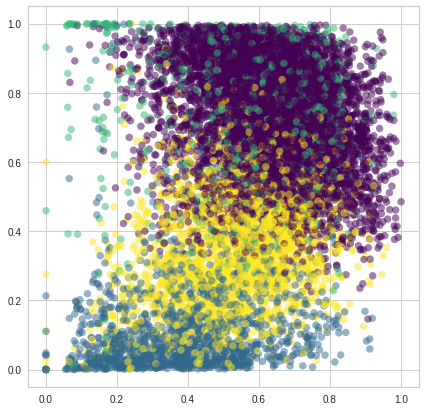

In [ ]:
cluster_plot(df[non_categorical])

# **PCA ( Principal Component Analysis)**

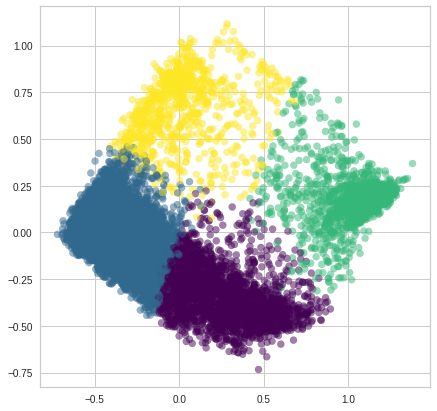

,0,1,2,3,4,5,6
0,0.256127,-0.521810,0.138744,-0.090820,0.127173,-0.112514,0.063021
1,-0.542197,0.000944,0.128033,-0.145677,0.016477,-0.030308,-0.002892
2,0.773966,0.020488,0.155532,-0.135814,0.148499,-0.179592,-0.091042
3,-0.339391,0.045402,-0.145966,0.077931,0.211139,0.173919,-0.092936
4,-0.325794,-0.065218,0.008516,-0.083025,-0.002374,-0.125450,0.046105


In [ ]:
pca = PCA(0.95)
data = df.drop_duplicates()
data = pca.fit_transform(data[non_categorical])
cluster_plot(pd.DataFrame(data))
pd.DataFrame(data).head()

In [ ]:
data = pd.DataFrame(data)

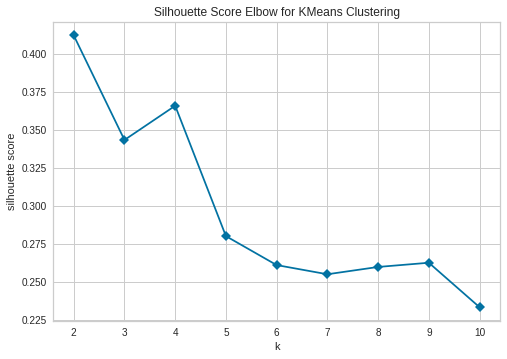

In [ ]:
silhouette(data)

#### From the above graph we can determine that the clustering algorithm requires four clusters

# **Model Training**

In [ ]:
def train(df_train):
    n = 1
    for _ in range(n):
        # train_df, test_df = train_test_split(df_train)
        km = KMeans(
            n_clusters=4, init='random',
            n_init=10, max_iter=1000, 
            tol=1e-04, random_state=0
        )
        y_km = km.fit(df_train)
        # km.labels_
        # km.predict(test_df)
    return km

def k_mean_distance(center_coordinates, data_coordiantes):
    summ=0
    mag=0
    for i in range(len(center_coordinates)):
        summ+=(center_coordinates[i]-data_coordiantes[i])**2
        mag+=(data_coordiantes[i])**2
    return (summ)*0.5

In [ ]:
km = train(data)
data = pd.DataFrame(data)
# pickle.dump(km, open('KMeans_Clustering', 'wb'))
data['label'] = km.labels_
data['artist'] = df.artist
data['name'] = df.name
data['preview'] = df.preview
data['popularity'] = df.popularity
data['type'] = df.label
data.head()

,0,1,2,3,4,5,6,label,artist,name,preview,popularity,type
0,0.256127,-0.521810,0.138744,-0.090820,0.127173,-0.112514,0.063021,1,Maroon 5,Memories,NaN,99,toplists
1,-0.542197,0.000944,0.128033,-0.145677,0.016477,-0.030308,-0.002892,3,Dua Lipa,Don't Start Now,https://p.scdn.co/mp3-preview/ed151225213380a4...,95,toplists
2,0.773966,0.020488,0.155532,-0.135814,0.148499,-0.179592,-0.091042,2,Billie Eilish,everything i wanted,NaN,94,toplists
3,-0.339391,0.045402,-0.145966,0.077931,0.211139,0.173919,-0.092936,3,Arizona Zervas,ROXANNE,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,88,toplists
4,-0.325794,-0.065218,0.008516,-0.083025,-0.002374,-0.125450,0.046105,3,Post Malone,Circles,NaN,68,toplists


# **Generating Outcome**

In [ ]:
def song_recommendation(song,data):
    arr = []
    dummy_df = data.loc[data['label']==song.label.values[0]]
    #print(len(dummy_df.values))
    for i in range(len(dummy_df.values)):
        if(i>51): break
        dist = k_mean_distance(dummy_df.values[i][0:7],song.values[0][0:7])
        arr.append((
            dummy_df.values[i][11]/(dist+0.00000001)**2,
            dist,
            dummy_df.values[i][11],
            dummy_df.values[i][8],
            dummy_df.values[i][9],
            dummy_df.values[i][10],
            dummy_df.values[i][12]
        ))
    arr.sort()
    return arr

def song_print(song):
    print()
    print('='*100)
    print('Artist:         ', song.artist.values[0])
    print('Song Name:      ', song.name.values[0])
    print('Type:           ', song['type'].values[0])
    print('='*100)
    print()

# **Searching Songs by Name**

In [ ]:
user_input = input("Enter song name: ")
song_list = []
for k in df['name']:
    if (user_input).lower() in (k).lower():
        #print(k)
        song_list = df[df['name']==k].index.values
        #for _ in song_list:
        #    song = data.loc[[_]]
        #    print(song)
        break

if len(song_list)==0:
    print("Oops!!! Song not found")
else:
    print('-'*100)
    print("Songs with similar name: ",len(song_list))
    song = data.loc[[random.choice(song_list)]]
    ans = song_recommendation(song,data)
    song_print(song)
    j=1
    for i in ans[::-1]:
        print('Number:               ', j)
        print('Popularity/distance:  ',i[0])
        print('Artist:               ', i[3])
        print('Song Name:            ', i[4])
        print('Type:                 ', i[6])
        print('-'*100)
        j+=1

Enter song name: memories
----------------------------------------------------------------------------------------------------
Songs with similar name:  1

Artist:          Maroon 5
Song Name:       Memories
Type:            toplists

Number:                1
Popularity/distance:   9.899999999999999e+17
Artist:                Maroon 5
Song Name:             Memories
Type:                  toplists
----------------------------------------------------------------------------------------------------
Number:                2
Popularity/distance:   124100.00759243607
Artist:                Old Dominion
Song Name:             One Man Band
Type:                  toplists
----------------------------------------------------------------------------------------------------
Number:                3
Popularity/distance:   55159.626746094546
Artist:                Pink Sweat$
Song Name:             Honesty - Remix
Type:                  toplists
-----------------------------------------------------

# **Searching Songs by Artist name**

In [ ]:
user_input = input("Enter artist name: ")
artist_list = []
for k in df['artist']:
    if (user_input).lower() in (k).lower():
        #print(k)
        artist_list = df[df['artist']==k].index.values
        #for _ in song_list:
        #    song = data.loc[[_]]
        #    print(song)
        break

if len(artist_list)==0:
    print("Oops!!! Artist not found")
else:
    print('-'*100)
    print("Songs with similar artist name: ",len(artist_list))
    song = data.loc[[random.choice(artist_list)]]
    ans = song_recommendation(song,data)
    song_print(song)
    j=1
    for i in ans[::-1]:
        print('Number:               ', j)
        print('Popularity/distance:  ',i[0])
        print('Artist:               ', i[3])
        print('Song Name:            ', i[4])
        print('Type:                 ', i[6])
        print('-'*100)
        j+=1

Enter artist name: doja cat
----------------------------------------------------------------------------------------------------
Songs with similar artist name:  7

Artist:          Doja Cat
Song Name:       Rules
Type:            toplists

Number:                1
Popularity/distance:   254178.68383934782
Artist:                24kGoldn
Song Name:             VALENTINO
Type:                  toplists
----------------------------------------------------------------------------------------------------
Number:                2
Popularity/distance:   234402.50182700728
Artist:                DaBaby
Song Name:             VIBEZ
Type:                  toplists
----------------------------------------------------------------------------------------------------
Number:                3
Popularity/distance:   164207.73240904897
Artist:                DaBaby
Song Name:             BOP
Type:                  toplists
-------------------------------------------------------------------------------

# **Model Evaluation**

In [ ]:
data_eval = data.iloc[:,0:7]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff00708ff10>,
                     model=None)

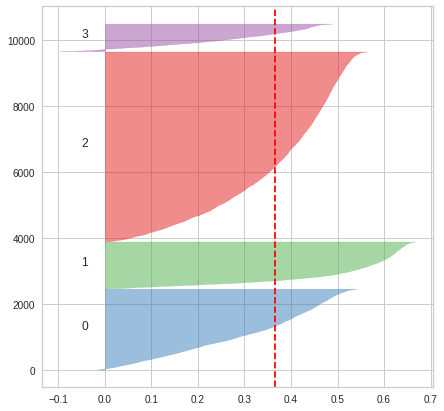

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
plt.figure(figsize = (7,7))
visualizer.fit(data_eval)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7feffa79dad0>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

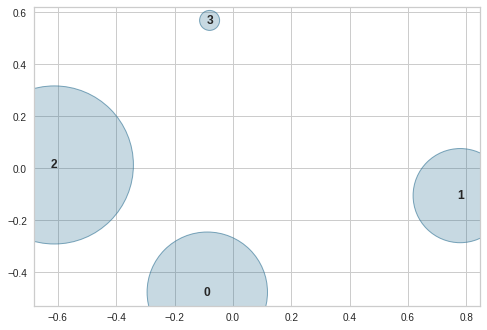

<Figure size 720x720 with 0 Axes>

In [ ]:
from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = InterclusterDistance(model)
plt.figure(figsize = (10,10))
visualizer.fit(data_eval)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

## **Spotify Songs**

In [ ]:
import requests, json, base64
clientId = "648371aa684041d49cf4416ef3f0aad7"
clientSK = "5ff1e9388ea04affaf7cf996536f4b86"

id_song = "11dFghVXANMlKmJXsNCbNl"


class Spotify:

    clientId = ""
    clientSK = ""
    token = ""
    header = ""
    base_url = "https://api.spotify.com/v1/"

    def __init__(self, ci, csk):
        self.clientId = ci
        self.clientSK = csk
        self.getToken()

    def getToken(self):
        url = "https://accounts.spotify.com/api/token"
        auth = base64.b64encode((self.clientId + ":" + self.clientSK).encode("utf-8"))
        header = {
            "Authorization" : "Basic " + str(auth, "utf-8"),
            "Content-type" : "application/x-www-form-urlencoded"
        }
        payload = {
            "grant_type" : "client_credentials"
        }
        response = requests.post(url, headers=header, data=payload).json()
        self.token = response["access_token"]
        head =  {
            "Authorization" : "Bearer " + self.token,
        }
        self.header = head

    def getCategories(self, num = 20):
        url = "https://api.spotify.com/v1/browse/categories?limit=20"
        response = requests.get(url, headers=self.header).json()
        cats = {}
        for it in response["categories"]["items"]:
            cats.update({it["id"] : it["href"]})
        return cats

    def getTrack(self):
        url = "https://api.spotify.com/v1/audio-features/06AKEBrKUckW0KREUWRnvT"
        response = requests.get(url, headers=self.header).json()
        print(response)

    def getPlaylists(self,category, num = 20):
        url = "https://api.spotify.com/v1/browse/categories/" + category + "/playlists?limit=20"
        response = requests.get(url, headers=self.header).json()
        print(response)
        plays = []
        for it in response["playlists"]["items"]:
            plays.append(it["id"])
        return plays

    def getPlaylistTracks(self,id):
        url = "https://api.spotify.com/v1/playlists/" + id + "/tracks"
        response = requests.get(url, headers=self.header).json()
        tracks = []
        for it in response["items"]:
            try:
                tracks.append({"id":it["track"]["id"], "artist" : it["track"]["artists"][0]["name"], "name": it["track"]["name"], "popularity" : it["track"]["popularity"], "preview" :  it["track"]["preview_url"]})
            except:
                pass
        return tracks

    def getTrackFeatures(self, track_arr):
        url = "https://api.spotify.com/v1/audio-features"
        queries = []
        i =0 
        while i <= len(track_arr):
            temp = track_arr[i: i + 100]
            str = ",".join(temp)
            queries.append(str)
            i = i+ 100
        # print(queries)
        trackdetails = []
        for items in queries:
            url = "https://api.spotify.com/v1/audio-features/?ids=" + items 
            response = requests.get(url, headers=self.header).json()
            trackdetails.extend(response["audio_features"])
        return trackdetails


spotify = Spotify(clientId,clientSK)

print("connected")
# data = ['2EyECcIQEsdFQoQRenrDcN', '5aGDIGKHrGAYJn33DsVdIF', '12NG9pyCWHHVU6qqi2eeY8', '1kCfP81Gj9wkbGkOpCkuZA', '7vIERuwVxmw24C1eKqbru7', '6lfMvOUpSYC0V2NFIsBLNI', '6C1fdB76jVoPCccAanw2dj', '6GeL3xpwOQ3wJu5qLMQJQc', '6QX9w5RIQvh20QrXuwbnFi', '3WNJcD4xvnHrt5q5RuzaeW', '02fMscVZ46N4l46yHZQkqT', '2MX3UFRtbMg7rqGxLjlP07', '3cn4bKSJShQzuoKMZ6XMis', '15SfsE8nukbTgfl8xu74d7', '3Uejh7R2Xq52oqrh8XOo5J', '0zMTiHXme9k2newg3Ir8Md', '7cw2yeC9wWZSuWwBjPTfwe', '6w938mZxCQfSjZRmwK329X', '32QACfMXvoSsiwxgulfIQU', '4QKV23A4GTDmZETzjtQI9c', '2JO3HwMRPeya8bXbtbyPcf', '0bHm2wFL0m7qZIlhO7PQu5', '6zQhANi5mDTELfSuUFPx4Q', '1i6N76fftMZhijOzFQ5ZtL', '2JzZ8UTEb1GGvR8Ra0Nfy2', '1y5LL9dpLXbCXNKKqw5wCJ', '0PDZ4Rgj36MxVgvoMv3sk5', '3yP0cohcr97BUNJcgvmSVg', '4OvQsAObGMF3dpkCV6DZzb', '1FL9DHDSED6lxNMDJUJQvB', '5p3JunprHCxClJjOmcLV8G', '5jzma6gCzYtKB1DbEwFZKH', '5moTxUGPZXgGmosl4rIELm', '16jUJ4RsmyQG8z3clJuUaz', '2UnY8ApZT4roi66n1LDAil', '7bx4zW72qdZKBb8p6g80jb', '78lgmZwycJ3nzsdgmPPGNx', '5ZgNecJcN9SSopnmCTlpXs', '5FTbeZMbUgKfaSaCN8bY09', '6HZ67VImxqr8aMBEEhblzf', '7bIQeY33PkduZRmR3h9BIY', '5YSI1311X8t31PBjkBG4CZ', '6Gi8vIT6In8RrT2eTKxoVR', '3W0xbvrZqaao3ZZEDhVQ0r', '4wZSxAXLNRFfQ0yyaCvHei', '0rme3FLbw5o1KLXpJzivjS', '0kqFlkmfvKzQ4QSmx5PZ1A', '6cFaRahEaLyew4ATx1QaUx', '1Qb2f8cDXorwKTbY0nQ0IH', '1aMxqU4b59JT5Y9Wtyusis', '0WNGPpmWqzPnk0psUhJ3SX', '6y4FVJwf09ssxuRnlEgXkp', '2hvOsGJc6qll4WzW8Ljqc3', '2QSD3K3b3BJ8DPhGhQfDPW', '21jBRxUvrWXTwBfGnQwyVy', '6FxD82u5P8yKohcYYDxyqw', '5QTxFnGygVM4jFQiBovmRo', '17GEcOhfo7rRr3wKumLHV2', '55TeO50ytH96i93yihdNJE', '1PwB9EADXS90I8LoewLXfl', '2h97II7QJZTBZv02HcocI7', '2yE3bwbhqypdsuhmv48Svn', '73HSIWZlSCfs4tqVkrGv7H', '7cdnq45E9aP2XDStHg5vd7', '0tsHAAhdxSzwHAeHHXKbsw', '6TNNMVpOgn8K5NoDC7alG6', '0ZfP7K8NoyJRjEfWWk8Mlv', '2sICTf5zrSZnTttimrcm2M', '0LzCSYjFxH3LKSU4UIeRBk', '4GRnCW4Alb5vcfptFytJdl', '4Ec8I6H20zu7F2vDdg90qP', '6RTh5BDes7y6KwC0rxW8WG', '0WghYc6JU0HbCvsgGlyqId', '3MFFDRC4wTN9JNGtzXsZlN', '5nYYu9UeWFZhjwFLJMfX77', '0ElRzK07sc9eszyk1ea9Ab', '3x0iCzjgf0v9lnwvAhU9P2', '3RZqcBz5WTWN2E5svMH162', '4Mj2GtsgUDaf43zxdw48hd', '3aInErz06eEAbRHMnsORR2', '3MmogIpfk1GVXRMmRjKLGI', '1wP1qnWy0cZWxnbWkzf9La', '0TaWdoJiAJoln9OQ1RbdNs', '00sydAz6PeOxYzwG1dRIPi', '7wLBPjReJhdkFtrGHgUcxG', '4lr8mubS2OpgJEOuPHx2rV', '0FnmRkP81O1I6oeOeU1xXS', '24M81fKyhTWBuYzczQMkOp', '5AdLu2shYmDMqt2pHaOEle', '6pXcyjABZyf6LKzL4wsj9k', '6e3qHQtKdbNhUVuuNNsyqD', '150NSrON3DeZM1aLyz3MoM', '5E5HYgxGMp3BPakHGfKfIB', '6ZWVeMysm8Q8zZu3lKnY2v', '7mxvuhmRrnQ31vHRm9A9qj', '2fWxcJeDQiLStdAdwF4ms6', '4l1Yx4GK7GU55Xtwl9we9U', '1vOgfMjWq10rW4h0U7yzO8', '5rJJnYeAeIsb0T4FkiaUvX', '4F797Kz0zqZiMxNcRdO8R2', '2rl3qVhTopu9De51tKCDUM', '2ngVZZGrIYAxyxaA2QcWTB', '65AABj5XsDcxGT92w3jK0o', '4wWQeafQ4q5WKafYIuUmY8', '0A8P76W8MXeulFGIHNWSG1', '716OZGLBg3vkNfMTpfbYm6', '0NyE3z63bQpiqDkx6DSjl0', '1ogk8gkNwRw9iHONH2CAna', '6z6i7ssJ5AIqSqhVcecJpa', '2XRT5pPoxTdudrcqfxHSvK', '01TyFEZu6mHbffsVfxgrFn', '14IN2apSi57uPG9hAC8kfL', '54H7CLmI5SE7wmhlE0THS5', '7b1aBkrngrTz8RXlkdQCay', '2DSxutganHw57vSdvmgjZt', '2Js2COGl7htc00CjZ2L2CO', '4soIPMs2XqUFu9roKupZ8I', '5P3JJGeG536cS1ciDnJsCk', '5KXPhIqiXPUBCxH3jyc10U', '5l4UVzmcW0vt2N7BXXS9M0', '41FUydVAeBuf0qLztk0d5j', '6jwZQIS9nPUQ7yCCouusqx', '5EUJ3wPl8KVTbsYgdsCixv', '66SPXY48GHqvedbRT7jBey', '66hEhjJ69nPkPyHCB5mANE', '5j375wUE1V53HpkKtiDKT2', '3HV9YnoYACjlrJ5CiZ3hLj', '46IEYjzyS37lltLLCDJbC0', '1B2SbIJqWWjMa7yGeeOWDp', '7eXDhsMpOFdsJWauZgq9qv', '1bnzho2GEO8gOg1j0a8Tnq', '5g6PqhkeTyARGPROM5Gosp', '6dDWdTZXJuDb5aMD3MC4eX', '4bMXxqBnfgHec86gvIJSb1', '0kBAFAVajRjCX8kXneVsZI', '5Pdsyk2NuTJ56mE97DmxmN', '2SIgKA7WTqDWQrcO8IP8Sc', '2Cw4Z95OdYBElmbdhj5EwU', '4QgIkSyVxv6FmsWO2dZz4J', '5jh147eWeuNyimT2Oo1A5J', '1pPesOxENcN3XdZGV3jOjs', '46YxybUOOH2MYRXBoHXUgw', '6jKDR323PynjvTkoWTNbqx', '4bFtkOCmHiRx6SjIAL1hdm', '7GfcvEme8J6sI3k8pNTU2Y', '7jqM0p5mYWqgwwVjdmWD8W', '2OGta1TI4EkWVR71xZBcfF', '7d9212orrSfVHQaSdesffl', '6D0RsrrwQ2YSYA9lv4lgz5', '2KeTrh78SDZCwwtmGlgncd', '5RyGi46ibm6UKnuDO5kpdO', '1l0CFINuN2Ug755WAxblxL', '4wf0EYJDLjaHoRXJ7fAvxm', '46Mq99aSEm1UoIg42pmCZm', '225WgsvbK6RoIH6Y7OhKP2', '19cprjSakswn0VsENCg6uu', '5I324DQSe589WK21l83G6X', '2OP0X9P8khKcUDtWUzCLHv', '1t3nMYYdEvbubaD5FMDglq', '4FDkX9JD3FzmttdfYI3JvS', '0K8N0F3efUhd55TxNGgmGD', '6PrTCr4WB1Pyf7Fk1Hd1Da', '75OoxBhx3J7ptBxmu4SqAi', '7cAkG4eP6QhXj3Sq3sdIfF', '71fC5JZdi0w1nTMnQomdsO', '5d9BthpFORCiN5S1lVGCSc', '68T6wCFarzNXU5dBywqc60', '5tJghWo8o7FYLtRDFpRg3R', '1Gij4Ja8h7W64VXi1Eqj6j', '21dr1PIP5wVs3OdpLaMkM3', '0cDpyfAXMCKgKEEnkYzb3D', '5rDzL33WiYowiXlZhwWvst', '2eN6V8hiaW2BB7ol4UVvYf', '0IhH5cuZdOg3eELZe4yVtk', '2s30KXFLxnyH9CHKoO3Yum', '0AACjaI0rxjufqxmsu6OfF', '3QNkkruVrn8sXLicRKg6P9', '5g2JXHcnhj6nmjzzE11G9P', '0v8UvAhruTvkA90MR7039n', '6urUaCWU3HXdalm0oZU1Cd', '7iJ5IuGJ7AX97KSrFfcREa', '2Y0xdEsWhfDAsvtMzFqJ73', '4Em5Dsf7FZheKNUuBvujzf', '6kCQsjFV3SubIrNTDkGrdr', '5zaVuOiil4YVgKLXEbya43']

categories = spotify.getCategories(30)

print("categories fetched")
for key, value in categories.items():
    categories[key] = spotify.getPlaylists(key,20)

print("playlists fetched")
print("write playlists to file")

with open('play.txt', 'w') as file:
    file.write(json.dumps(categories))

data = []
with open('play.txt') as f:
    for line in f:
        data.append(json.loads(line))

categories = data[0]

for key, value in categories.items():
    tracks = []
    for playlists in value:
        tracks.extend(spotify.getPlaylistTracks(playlists))
    categories[key] = tracks

del categories["wellness"]

for key, value in categories.items():
    print(key, len(value))
    if(len(value) == 0):
        del categories[key]

print("write categories file")
with open('/content/drive/MyDrive/Datasets/cat.txt', 'w') as file:
    file.write(json.dumps(categories))

data = []
with open('/content/drive/MyDrive/Datasets/cat.txt') as f:
    for line in f:
        data.append(json.loads(line))
categories = data[0]

for key, value in categories.items():
    track = []
    for tracks in value:
        track.append(tracks["id"])
    track_desc = spotify.getTrackFeatures(track)
    print(len(value), len(track_desc))
    for i in range(len(value)):
        try:
            value[i].update(track_desc[i]) 
        except:
            pass
print("abc")

with open('/content/drive/MyDrive/Datasets/final.txt', 'w') as file:
     file.write(json.dumps(categories))

connected
categories fetched
{'playlists': {'href': 'https://api.spotify.com/v1/browse/categories/toplists/playlists?offset=0&limit=20', 'items': [{'collaborative': False, 'description': 'Hier ist der Name Programm. Die aktuellen Hits in einer Liste. Cover: Ed Sheeran', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX4jP4eebSWR9'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4jP4eebSWR9', 'id': '37i9dQZF1DX4jP4eebSWR9', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f000000034b09e0e52371dc3b01f4ebd9', 'width': None}], 'name': 'Hot Hits Deutschland', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYzNTQ1ODQ2MCwwMDAwMDE2MjAwMDAwMTdjYzhlYmE5ZjkwMDAwMDE3Y2M3MjQ3NzEx', 'tracks': {'href': 'https://api.s

KeyError: ignored

In [ ]:
import csv
data = []
with open('/content/drive/MyDrive/Datasets/final.txt') as f:
    for line in f:
        data.append(json.loads(line))

data = data[0]

d = []
for key, value in data.items():
    for values in value:
        values.update({"label": key})
        d.append(values)

# with open('mycsvfile.csv', 'w') as f:
#     w = csv.DictWriter(f, my_dict.keys())
#     w.writeheader()
#     w.writerow(my_dict)


f = open('/content/drive/MyDrive/Datasets/data_new.csv', 'w')
w = csv.DictWriter(f, d[0].keys())
w.writeheader()
w.writerows(d)
f.close()